# Lab assignment: perceptron training

Hecho por:
- **Christian Berdejo Sánchez**
- **Pablo Nieto Rodriguez**
- **Tarek Rababy López**

In this assignment we will learn how perceptrons work and are trained.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>This is an advanced and voluntary exercise that can help you gain a deeper knowledge into the topic. Good luck!</td></tr>
</table>


During the assignment you will make use of several Python packages that might not be installed in your machine. If that is the case, you can install new Python packages with

    conda install PACKAGENAME
    
if you are using Python Anaconda. Else you should use

    pip install PACKAGENAME

You will need the following packages for this particular assignment. Make sure they are available before proceeding:

* **numpy**
* **scikit-learn**

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells.

Let's go!

## The AND and OR problems

Let us define the AND and OR problems in the **dataset** form we will be using throughout this assignment. A dataset is composed of two matrices X and Y, storing respectively the **inputs** fed to the networks and the desired **outputs** or **targets** for such inputs. We will use numpy's arrays for this purpose:

In [ ]:
import numpy as np
X_and = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
Y_and = np.array([[0], [0], [0], [1]])
X_or = X_and.copy()    # same inputs as for AND
Y_or = np.array([[0], [1], [1], [1]])
print(X_and)
print(Y_and)
print(X_or)
print(Y_or)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [0]
 [0]
 [1]]
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[[0]
 [1]
 [1]
 [1]]


Note that in the patterns above we have prepended a 1, so that the **weights** **w** also include the **bias** term b and a dot product of the form **w**·**x** actually computes **w**·**x** + b. Hence, in this particular case **w** = (b, w1, w2).

## Perceptrons

As you have seen in the theory, **perceptrons** are based on the **McCulloch-Pitts neuron**, which is a simplified version of a neuron in the human brain. The **activation function** of this neuron is 1 when its inputs are greater than or equal to 0, and 0 otherwise:

In [ ]:
def step_activation(x):
    return 1*(x >= 0)   # multiply by 1 to change from boolean to int

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Figure out by yourself some values for <b>w</b> which solve the AND and OR problems. Store them in 2 variables called <b>w_and</b> and <b>w_or</b>.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
It may help if you print the points in (x1, x2) axes and interpret <b>w</b> and b as a hyperplane.
 </td></tr>
</table>

In [ ]:
w_and = np.array([-1.5, 1, 1])
w_or = np.array([-0.5, 1, 1])

If your weights are correct, the following should output true:

In [ ]:
print(np.all(step_activation(X_and.dot(w_and)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or)) == Y_or.ravel()))

True
True


Observe that we are already taking advantage of **matrix calculus**: by multiplying above the input matrix with the weight vector we can simultaneously obtain the perceptron's outputs for all patterns. Then we just need to compare whether those outputs are actually the desired ones.

Let us code now **Rosenblatt's perceptron**, so that it learns automatically **w_and** and **w_or** for us, as they are both **linearly separable** problems.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement Rosenblatt's perceptron in a function called **perceptron_learn**. The inputs should be the X and Y matrices for the problem to be solved, and the output should be the **w** vector comprising both the bias and the actual weights.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Rosenblatt's algorithm operates in an **online** way, so you cannot take advantage of matrix calculus, as the weight vector **w** may change with every single pattern.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
For comparison purposes, initialize **w = 0**. The function **zeros** in numpy does exactly this.
 </td></tr>
</table>

In [ ]:
def perceptron_learn(X, Y, initial_w=None, learning_rate=1.0, max_epochs=1000, ):
    """
    Implementación del perceptrón de Rosenblatt.

    Parámetros:
      X: matriz de entradas (n_samples x n_features), donde cada fila es un patrón y la primera columna es 1 (bias)
      Y: vector (o matriz columna) de salidas deseadas (targets)
      learning_rate: tasa de aprendizaje (por defecto 1.0)
      initial_w: pesos iniciales (por defeto se inicializa el vector a 0)
      max_epochs: número máximo de épocas a iterar (por defecto 1000)

    Retorna:
      w: vector de pesos aprendido (incluye bias y pesos de las características)
      epochs: número de épocas requeridas para la convergencia
    """
    Y = Y.ravel()              # Convertimos Y a un array unidimensional
    w = np.zeros(X.shape[1]) if initial_w is None else initial_w
    epochs = 0
    for epoch in range(max_epochs):
        errors = 0
        for i in range(X.shape[0]):
            # Calculamos la suma ponderada (entrada neta) para el patrón i
            net_input = np.dot(X[i], w)
            # Función de activación: si la entrada neta >= 0, salida = 1; en caso contrario, 0.
            output = step_activation(net_input)
            # Actualización de pesos si la predicción es incorrecta
            if output != Y[i]:
                w += learning_rate * (Y[i] - output) * X[i]
                errors += 1
        epochs += 1
        # Si en una época no se producen errores, se ha alcanzado la convergencia.
        if errors == 0:
            break
    return w, epochs






<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Test your implementation with the AND and OR problems. How many **epochs** are needed for convergence? What values do you get for **w_and** and **w_or**?
 </td></tr>
</table>

In [ ]:
# Entrenamiento y evaluación para compuerta AND con perceptrón propio
w_and_custom, epochs_and_custom = perceptron_learn(X_and, Y_and)
print("=== Implementación propia del Perceptrón para compuerta AND ===")
print("Pesos aprendidos (w_and):", w_and_custom)
print("Épocas necesarias para convergencia (AND):", epochs_and_custom)

# Entrenamiento y evaluación para compuerta OR con perceptrón propio
w_or_custom, epochs_or_custom = perceptron_learn(X_or, Y_or)
print("=== Implementación propia del Perceptrón para compuerta OR ===")
print("Pesos aprendidos (w_or):", w_or_custom)
print("Épocas necesarias para convergencia (OR):", epochs_or_custom)


=== Implementación propia del Perceptrón para compuerta AND ===
Pesos aprendidos (w_and): [-3.  2.  1.]
Épocas necesarias para convergencia (AND): 6
=== Implementación propia del Perceptrón para compuerta OR ===
Pesos aprendidos (w_or): [-1.  1.  1.]
Épocas necesarias para convergencia (OR): 4


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that these new values for **w_and** and **w_or** do solve the respective problems. What happens if you initialize weights differently in **perceptron_learn**?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Although Rosenblatt's algorithm states that all weights should be initialized to 0, you can initialize them randomly and convergence is still guaranteed.
 </td></tr>
</table>

In [ ]:
#Check if 'AND' and 'OR' is correct
print(np.all(step_activation(X_and.dot(w_and_custom)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or_custom)) == Y_or.ravel()))


True
True


In [ ]:
random_w = np.random.rand(X_and.shape[1])

w_and_custom, epochs_and_custom = perceptron_learn(X_and, Y_and, initial_w=random_w)

print("=== Implementación propia del Perceptrón para compuerta AND ===")
print("Pesos aprendidos (w_and):", w_and_custom)
print("Épocas necesarias para convergencia (AND):", epochs_and_custom)


random_w = np.random.rand(X_or.shape[1])

w_or_custom, epochs_or_custom = perceptron_learn(X_or, Y_or, initial_w=random_w)
print("=== Implementación propia del Perceptrón para compuerta OR ===")
print("Pesos aprendidos (w_or):", w_or_custom)
print("Épocas necesarias para convergencia (OR):", epochs_or_custom)


print(np.all(step_activation(X_and.dot(w_and_custom)) == Y_and.ravel()))
print(np.all(step_activation(X_or.dot(w_or_custom)) == Y_or.ravel()))



=== Implementación propia del Perceptrón para compuerta AND ===
Pesos aprendidos (w_and): [-2.69112279  2.24511616  1.18174469]
Épocas necesarias para convergencia (AND): 6
=== Implementación propia del Perceptrón para compuerta OR ===
Pesos aprendidos (w_or): [-0.13135331  0.29061115  0.73244238]
Épocas necesarias para convergencia (OR): 2
True
True


Aunque el algoritmo de Rosenblatt establece que todos los pesos deben inicializarse en 0, podemos inicializarlos aleatoriamente y aun así garantizar la convergencia, ya que el algoritmo ajustará los pesos correctamente con el tiempo.

Si inicializamos los pesos de manera diferente en perceptron_learn, el número de épocas necesarias para la convergencia puede variar, pero el algoritmo seguirá encontrando una solución correcta siempre que el problema sea linealmente separable.

---

Let us compare our implementation with that of *scikit-learn*. The class which implements a perceptron is **Perceptron**:

In [ ]:
from sklearn.linear_model import Perceptron
Perceptron()

Perceptron()

In order to make things comparable, we need no regularization and not shuffling the patterns in each epoch:

In [ ]:
Perceptron(alpha = 0.0, shuffle=False)

Perceptron(alpha=0.0, shuffle=False)

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Train the scikit-learn perceptron for the AND and OR problems. Do you obtain the same values for **w_and** and **w_or**? Why/why not?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Make sure that the parameter **n_iter** is at least as large as the number of epochs you obtained before.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Since *scikit-learn* splits weights (**coef_**) from biases (**intercept_**), we do not need to prepend anymore a 1 to the patterns. Be careful when feeding them to the **fit** method. Also, take this into account when checking the perceptron's output and comparing it to the one obtained with your method **perceptron_learn**.
 </td></tr>
</table>

In [ ]:
from sklearn.linear_model import Perceptron

p_and = Perceptron(random_state=0)
# Usamos X_and[:, 1:] porque la primera columna de X_and es el 1 para el sesgo
p_and.fit(X_and[:, 1:], Y_and.ravel())

print("=== Perceptrón para compuerta AND ===")
# Mostramos pesos (coef_) e intercepto, así como precisión en entrenamiento
print("Pesos (coef):", p_and.coef_)
print("Intercepto (bias):", p_and.intercept_)
y_pred_and = p_and.predict(X_and[:, 1:])
print("Predicciones:", y_pred_and)
print("Etiquetas verdaderas:", Y_and.ravel())
print("Exactitud (score):", p_and.score(X_and[:, 1:], Y_and.ravel()))
print("Épocas necesarias para convergencia (AND):", p_and.n_iter_)




=== Perceptrón para compuerta AND ===
Pesos (coef): [[2. 2.]]
Intercepto (bias): [-2.]
Predicciones: [0 0 0 1]
Etiquetas verdaderas: [0 0 0 1]
Exactitud (score): 1.0
Épocas necesarias para convergencia (AND): 10


In [ ]:


# Entrenamiento del perceptrón de scikit-learn para OR
p_or = Perceptron(alpha=0.0, shuffle=False,  random_state=0)
p_or.fit(X_or[:, 1:], Y_or.ravel())  # Quitamos la columna del sesgo


print("=== Perceptrón para compuerta OR ===")
# Mostramos pesos (coef_) e intercepto, así como precisión en entrenamiento
print("Pesos (coef):", p_or.coef_)
print("Intercepto (bias):", p_or.intercept_)
y_pred_or = p_or.predict(X_or[:, 1:])
print("Predicciones:", y_pred_or)
print("Etiquetas verdaderas:", Y_or.ravel())
print("Exactitud (score):", p_or.score(X_or[:, 1:], Y_or.ravel()))
print("Épocas necesarias para convergencia (OR):", p_or.n_iter_)




=== Perceptrón para compuerta OR ===
Pesos (coef): [[2. 2.]]
Intercepto (bias): [-1.]
Predicciones: [0 1 1 1]
Etiquetas verdaderas: [0 1 1 1]
Exactitud (score): 1.0
Épocas necesarias para convergencia (OR): 8


**Para la compuerta AND:**
- Nuestra implementación obtuvo w_and = [2,1] y bias = -3.
- Scikit-learn encontró w_and = [2, 2] y bias = -2.


**Para la compuerta OR:**
- Nuestra implementación obtuvo w_or = [1, 1] y bias = -1.
- Scikit-learn encontró w_or = [2, 2] y bias = -1.


Ambos modelos convergen correctamente y clasifican los datos de forma precisa. Sin embargo, la diferencia en la forma en que se ajustan los pesos y el sesgo en cada implementación puede llevar a soluciones distintas, pero igualmente válidas.

## The XOR problem

As you know from the theory, Rosenblatt's perceptrons can only solve **linearly separable** problems. The AND and OR problems fall into this category, but the XOR problem does not.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Define the XOR problem in two matrices **X_xor**, **Y_xor** as we did above for the AND and OR problems.
 </td></tr>
</table>

In [ ]:

import numpy as np

X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_xor = np.array([[0], [1], [1], [0]])

print(X_xor)
print (Y_xor)



[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that **perceptron_learn** does not converge when given the XOR problem.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Introduce some control to exit the function after a maximum number of epochs has been reached. Otherwise, execution will go on forever and can stall your PC.
 </td></tr>
</table>

In [ ]:

# Intentamos entrenar el perceptrón con XOR
w_xor, epochs_xor = perceptron_learn(X_xor, Y_xor,max_epochs=1000)

print("Pesos obtenidos:", w_xor)
print("Épocas transcurridas:", epochs_xor)




Pesos obtenidos: [-1. -1.]
Épocas transcurridas: 1000


Como se puede ver, llega hasta el final de iteraciones que le definimos y nunca llega a converger en el resultado.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Verify that scikit-learn's **Perceptron** does not converge either for the XOR problem.
 </td></tr>
</table>

In [ ]:

from sklearn.linear_model import Perceptron

# Creamos y entrenamos el perceptrón de Scikit-Learn para el problema XOR
p_xor = Perceptron( random_state=0, max_iter=1000)
p_xor.fit(X_xor, Y_xor.ravel())

print("Pesos (coef):", p_xor.coef_)
print("Intercepto (bias):", p_xor.intercept_)
print("Exactitud (score):", p_xor.score(X_xor, Y_xor.ravel()))



Pesos (coef): [[0. 0.]]
Intercepto (bias): [0.]
Exactitud (score): 0.5


Se dejan 1000 iteraciones y es incapaz de resolverlo.

## Multilayer perceptrons

Because of the limitations perceptrons have, **multilayer perceptrons (MLPs)** are usually the choice when dealing with general problems. Let us use for now the following class for an MLP:

In [ ]:
class MLP(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

So that an MLP is initialized with a list specifying the sizes of the different layers. For instance:

In [ ]:
sizes = [2, 3, 1]
net = MLP(sizes)

Creates an MLP with 2 input neurons, 3 hidden neurons and 1 output neuron. <u>Note also the convention of the weights: they are created in such a way that *weights[i][j][k]* denotes the weight connecting neuron k of the i-th layer to neuron j of the (i+1)-th layer</u> (assuming that input layer is layer 0, first hidden layer is layer 1, and so on). <u>The same logic applies for biases, so that *biases[i][j]* is the bias of neuron j of the (i+1)-th layer</u>.

In [ ]:
print("Number of layers: " + str(net.num_layers))
print("Sizes of layers: " + str(net.sizes))
print("Biases of hidden layer: " + str(net.biases[0]))
print("Biases of output layer: " + str(net.biases[1]))
print("Weights between input and hidden layer: " + str(net.weights[0]))
print("Weights between hidden and output layer: " + str(net.weights[1]))

Number of layers: 3
Sizes of layers: [2, 3, 1]
Biases of hidden layer: [[-0.2326286 ]
 [ 0.86612904]
 [-1.3919504 ]]
Biases of output layer: [[2.05811916]]
Weights between input and hidden layer: [[ 0.05906961 -0.44122355]
 [-0.13997437 -0.12693731]
 [ 2.44869317  0.00364217]]
Weights between hidden and output layer: [[-2.55537951  0.05181325  0.23252555]]


Let us assume for simplicity that all **activation functions** in our MLPs are going to be the *step_activation* defined above. Note that its implementation is vectorized, so that it works both for scalars and numpy arrays.

We can now easily program the **forward phase** of the **back-propagation** algorithm, that is, to input a pattern to the network and compute the network's outputs.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Implement the function **forward_phase(mlp, x)** that, given an MLP and an input vector **x**, computes the MLP's outputs when **x** is fed.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Take advantage of matrix calculus. Make sure to reshape the input vector to column form, so that the matrix-vector products do not raise errors.
 </td></tr>
</table>

In [ ]:
def forward_phase(mlp,x):
    a = x.reshape(-1, 1)  # Convierte x en un vector columna
    for b, w in zip(mlp.biases, mlp.weights):
        z = np.dot(w, a) + b  # Producto punto con pesos y se suma el sesgo
        a = step_activation(z)  # Pasa por la función de activación
    return a



Since weights in the MLP class are initialized randomly, it is very unlikely that these initial weights actually solve the XOR problem.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Check whether the MLP created above does solve XOR or not.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Again, the MLP class splits weights from biases, so you should not feed to the networks the ones prepended to the patterns.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Because of matrix calculus, the return of **forward_phase** will be in matrix form, when it is actually a scalar since there is only a single output neuron. You may need to flatten return values to compare them to the actual outputs.
 </td></tr>
</table>

In [ ]:

# Evaluate each input individually
outputs = np.array([forward_phase(net, x) for x in X_xor])

print(outputs)
print("\nIs the answer correct?: " + str(np.all(outputs.flatten() == Y_xor.flatten())))


[[[1]]

 [[1]]

 [[1]]

 [[1]]]

Is the answer correct?: False


<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Build an MLP that actually solves XOR.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
You know from the theory that it suffices with a hidden layer of just 2 neurons. Because we have not coded any learning algorithm (we would need to program the whole back-propagation algorithm for that), you will have to set directly its weights and biases so that it does the job.
 </td></tr>
</table>

In [ ]:
net = MLP([2, 2, 1])

# Proposed weights and biases to solve XOR
net.weights = [
    np.array([[1, -1], [-1, 1]]),  # Capa oculta
    np.array([[1, 1]])          # Capa de salida
]
net.biases = [
    np.array([[-0.5], [-0.5]]),  # Capa oculta
    np.array([[-0.5]])        # Capa de salida
]

# Evaluate the MLP with XOR inputs
outputs = np.array([forward_phase(net, x) for x in X_xor])
print(outputs)
print("\nIs the answer correct?: " + str(np.all(outputs.flatten() == Y_xor.flatten())))


[[[0]]

 [[1]]

 [[1]]

 [[0]]]

Is the answer correct?: True


**XOR(A,B)=(A AND ¬B) OR (¬A AND B)**

Primera neurona oculta: A AND ¬B

w1 =  1
w2 = -1
b =  -0.5

<table>
    <tr>
        <th>A</th>
        <th>B</th>
        <th>A AND ¬B</th>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
</table>

Segunda neurona oculta: ¬A AND B

w1 = -1
w2 =  1
b = -0.5

<table>
    <tr>
        <th>A</th>
        <th>B</th>
        <th>¬A AND B</th>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
</table>

Neurona de salida (XOR): (A AND ¬B) OR (¬A AND B)

w1 =  1
w2 =  1
b = -0.5

<table>
    <tr>
        <th>A AND ¬B</th>
        <th>¬A AND B</th>
        <th>Salida</th>
    </tr>
    <tr>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>0</td>
    </tr>
</table>

Coding oneself the back-propagation algorithm is tedious and prone to errors (especially the **backward phase**), so it is only useful as an academic programming exercise. In practice, one resorts to implementations already available. *Scikit-learn* has two classes for MLPs, the **MLPClassifier** and the **MLPRegressor**:

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
print(MLPClassifier())
print(MLPRegressor())

MLPClassifier()
MLPRegressor()


The only differences between the two are the **loss function** (**cross-entropy** for classification, **MSE** for regression) and the activation function of the output layer (**sigmoid** for classification, **identity** for regression). As you can see, the parameters used in construction are exactly the same ones, as well as the default values.

<table align="left">
 <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td>
Discuss which of the above parameters you can identify with those seen in the theory slides and which you cannot.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
Take some classification dataset used in the SVM assignments and fit an *MLPClassifier* by modifying the parameters you deem appropriate. Report the best network configuration you can find. Can you beat the best SVM you obtained for that problem?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td>
Repeat with some regression dataset and an *MLPRegressor*. Are you able to beat the SVR?
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Beware of normalizing your data before feeding them to an MLP. It is advised to use a pipeline with a *StandardScaler*.
 </td></tr>
</table>

<table align="left">
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td>
Once in a pipeline, you can use grid search to try different choices for the MLP parameters.
 </td></tr>
</table>

Creamos el dataset de la práctica anterior

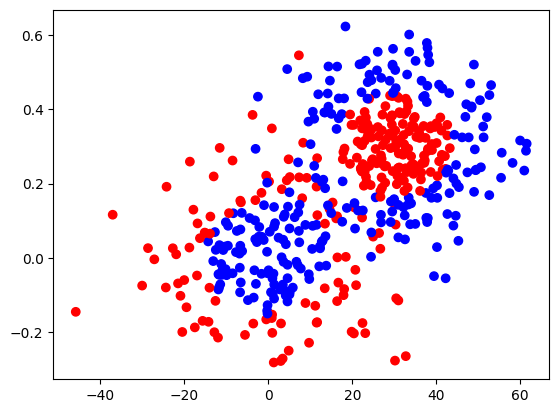

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_gaussian_quantiles

RND_STATE=np.random.RandomState(42)
# Build first cluster
X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=RND_STATE)
# Build second cluster
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=RND_STATE)
# Fuse them, scaling features differently and switching labels of y2
X = np.concatenate((X1, X2))
X[:, 0] *= 10
X[:, 1] /= 10
y = np.concatenate((y1, -y2+1))

cm = ListedColormap(['#0000FF', '#FF0000'])    # blue, red
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm)
plt.show()

Importamos las librerías necesarias

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.base import is_classifier, is_regressor
from sklearn.svm import SVC, SVR


from sklearn.metrics import classification_report, r2_score, mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


Creamos una función para probar todos los pipelines

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def execute_model(X, y, pipeline, grid, score='accuracy'):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform grid search with cross-validation
    gv = GridSearchCV(pipeline, grid, cv=5,scoring=score)
    gv.fit(X_train, y_train)

    # Print the best parameters and score
    print("Best parameters found: ", gv.best_params_)
    print("Best score: ", gv.best_score_)

    # Get the best model and make predictions
    bestmodel = gv.best_estimator_
    y_pred = bestmodel.predict(X_test)

    # Print the classification report
    if is_classifier(bestmodel):
        print(classification_report(y_test, y_pred))
    elif is_regressor(bestmodel):
        print("R2 score: ", r2_score(y_test, y_pred))
        print("Mean squared error: ", mean_squared_error(y_test, y_pred))
        print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))


Creamos los pipelines y los grids

In [ ]:
pl_svc = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])
pl_svr = Pipeline([("scaler", StandardScaler()), ("svm", SVR())])
pl_mlpc = Pipeline([("scaler", StandardScaler()), ("mlp", MLPClassifier())])
pl_mlpr = Pipeline([("scaler", StandardScaler()), ("mlp", MLPRegressor())])



grid_svm = {
    'svm__C': np.logspace(-2, 4, 7),
    'svm__gamma': np.logspace(-4, 4, 9)
}


grid_mlp = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50,50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__solver': ['adam', 'sgd'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}



**CLASIFICADOR**

In [ ]:
print("SVM Calificator")
execute_model(X,y,pl_svc,grid_svm,)


SVM Calificator
Best parameters found:  {'svm__C': np.float64(10.0), 'svm__gamma': np.float64(1.0)}
Best score:  0.9175000000000001
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        46
           1       0.94      0.81      0.87        54

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.87      0.87       100



In [ ]:
print("MLP Calificator")
execute_model(X,y,pl_mlpc,grid_mlp)


MLP Calificator
Best parameters found:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__solver': 'adam'}
Best score:  0.9125
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        46
           1       0.94      0.85      0.89        54

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



MLP en el calificador obtiene un resultado muy parecido a SVM, parece ser que es capaz de vencer a SVM con 50 capas capas.

**REGRESOR**

In [ ]:
print("SVM Regressor")
execute_model(X,y,pl_svr,grid_svm,'r2')


SVM Regressor
Best parameters found:  {'svm__C': 1.0, 'svm__gamma': 10.0}
Best score:  0.6766475243121512
R2 score:  0.580465772240685
Mean squared error:  0.10421230217541386
Mean absolute error:  0.2014064831029328


In [ ]:
print("MLP Regressor")
execute_model(X,y,pl_mlpr,grid_mlp,'r2')


MLP Regressor
Best parameters found:  {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__solver': 'adam'}
Best score:  0.6165567807480257
R2 score:  0.5518951620199106
Mean squared error:  0.11130924175425419
Mean absolute error:  0.26704305223481195


En este caso, para este dataset MLP lo hace un poco peor que el SVM regressor. A lo mejor podría mejorarse aumentando el nº de capas de perceptrones. Pero lo que se puede concluir es que MLP tiene potencial para igual y superar en muchas circunstancias a SVM

<center>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
                          THIS IS THE END OF THE ASSIGNMENT<br>
~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.~.<br>
</center>